In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
import seaborn as sns


### Read the data from github repository and drop uniqe values from it, also combining colunms which are related each other

In [112]:
url = 'https://raw.githubusercontent.com/AtesBurak1/Ceng-474-Final/main/smoking.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
##missing_count = df.isna().sum()  0
##print(missing_count)   0

#No need id because it is unique to everyone
df = df.sort_values(by = 'ID')
df = df.drop(['ID'], axis = 1)
## No need for oral column since every value is 1
df = df.drop(['oral'], axis = 1)

## Encode
df['gender'] = df['gender'].replace({'F': 0, 'M': 1})
df['tartar'] = df['tartar'].replace({'Y': 1, 'N': 0})
## Combine left and right eyesight and hearing



### Fix the blind values for eyesight, then combine eyesight

In [113]:
columns_to_replace = ['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df[columns_to_replace] = df[columns_to_replace].replace(9.9, 0)

df['eyesight'] = df[['eyesight(left)', 'eyesight(right)']].mean(axis=1)
df['hearing'] = df[['hearing(left)', 'hearing(right)']].mean(axis=1)
df = df.drop(['eyesight(left)', 'eyesight(right)','hearing(left)', 'hearing(right)'],axis = 1)

In [114]:
#Describe data to look is there any outlayer values
df.describe()

,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight,hearing
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,0.635657,44.182917,164.649321,65.864936,82.046418,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.555556,0.367288,0.993679,1.025865
std,0.481250,12.071418,9.194597,12.820306,9.274223,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.496908,0.482070,0.301393,0.137929
min,0.000000,20.000000,130.000000,30.000000,51.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,40.000000,160.000000,55.000000,76.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000,0.800000,1.000000
50%,1.000000,40.000000,165.000000,65.000000,82.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,55.000000,170.000000,75.000000,88.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000,1.000000,1.200000,1.000000
max,1.000000,85.000000,190.000000,135.000000,129.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000,1.000000,2.000000,2.000000


### Pieplot

<AxesSubplot: ylabel='gender'>

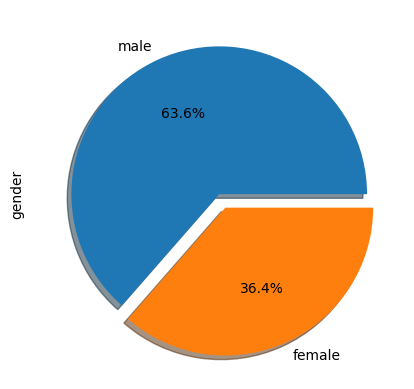

In [143]:
# The pie plot refenced from here -> https://www.kaggle.com/code/abdalrahmanshahrour/predict-smoking-status-accuracy-99-2-93-6
df['gender'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["male","female"], shadow=True)


<AxesSubplot: ylabel='smoking'>

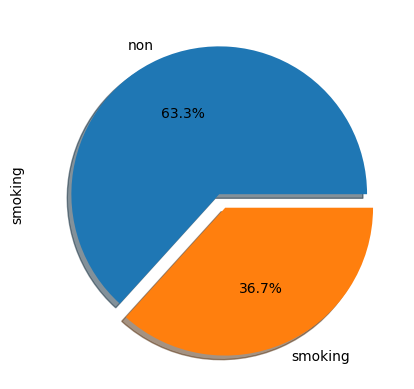

In [144]:

df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

## CatPlot

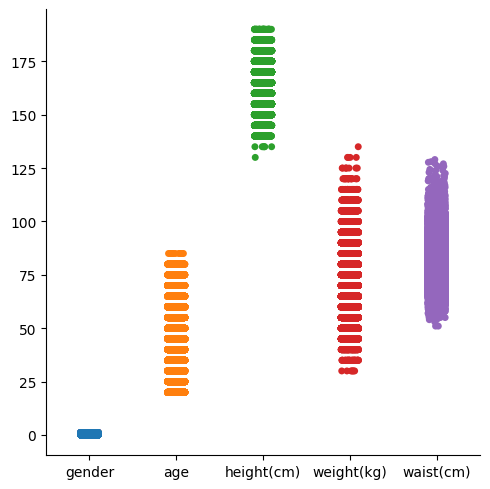

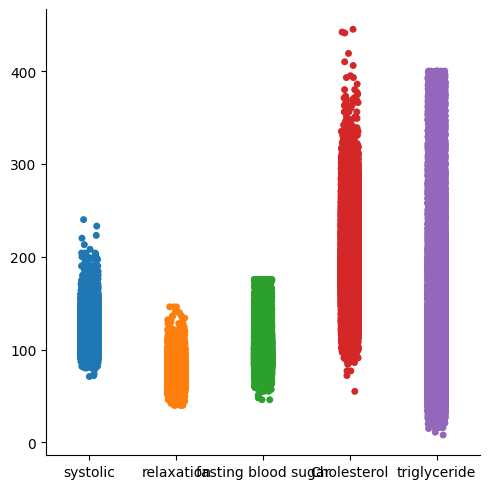

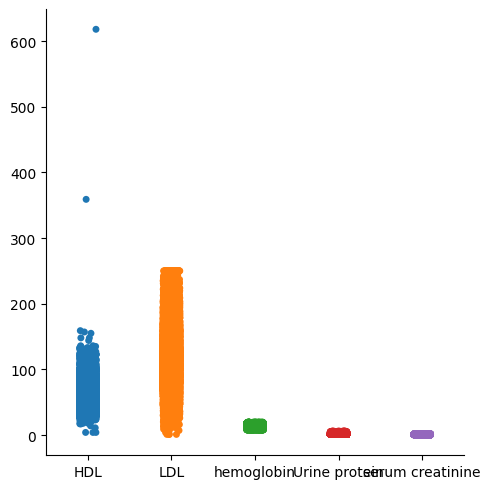

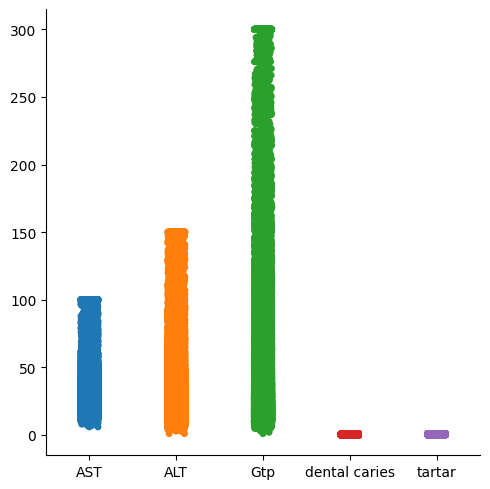

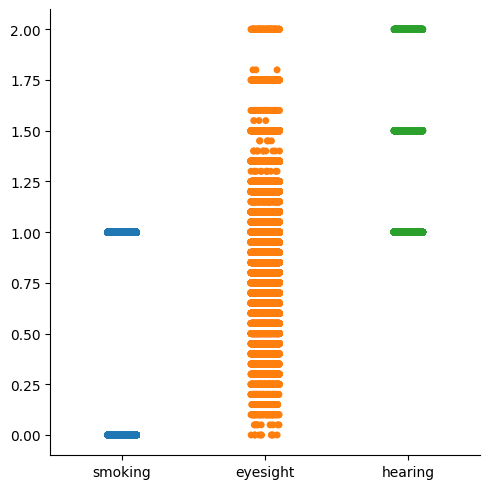

In [145]:
#CatPlots
sns.catplot(df.iloc[:, 0:5])
sns.catplot(df.iloc[:, 5:10])
sns.catplot(df.iloc[:, 10:15])
sns.catplot(df.iloc[:, 15:20])
sns.catplot(df.iloc[:, 20:23])

## BoxPlot

<AxesSubplot: xlabel='gender'>

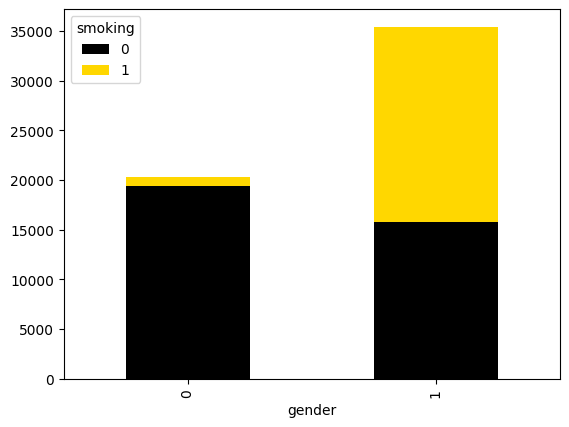

In [146]:
#BoxPlot
smoker_counts = pd.crosstab(index=[df['gender']], columns=df['smoking'], margins=True)

smoker_counts.iloc[:-1, :-1].plot(kind='bar', stacked=True, color=['black', 'gold'], grid=False, )


## HeatMap

<AxesSubplot: >

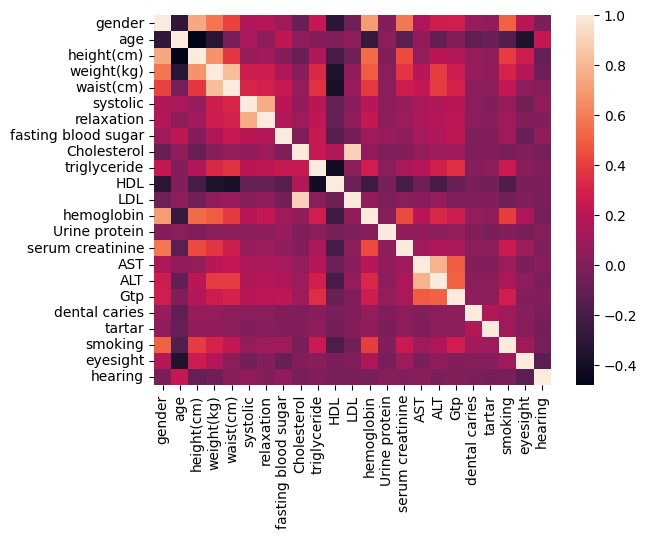

In [147]:
#HeatMap
corelation=df.corr()
sns.heatmap(corelation)

#Get rid of outlayer

In [148]:
# Make max values like this beacuse of outlayers still exist and we cant delete all of them, there could be too much data loss  got the values from https://www.kaggle.com/code/m000sey/ps-3-24-boosting-ensemble-w-nn
df['Gtp'] = np.clip(df['Gtp'], 0, 300)
df['LDL'] = np.clip(df['LDL'], 0, 250)
df['ALT'] = np.clip(df['ALT'], 0, 150)
df['AST'] = np.clip(df['AST'], 0, 100)
df['serum creatinine'] = np.clip(df['serum creatinine'], 0, 2)
df['fasting blood sugar'] = np.clip(df['fasting blood sugar'], 0, 175)
df['triglyceride'] = np.clip(df['triglyceride'], 0, 400)
df['hemoglobin'] = np.clip(df['hemoglobin'], 8, 20)

In [149]:
temp_df = df.copy()
def split_data():
  rows_for_test = []

  test_zero_label = (temp_df['smoking'] == 0).sum()
  test_one_label = df.shape[0] - test_zero_label
  print(test_one_label, test_zero_label)
  test_zero_label = test_zero_label - test_one_label + 128

  counter_0 = int(test_zero_label/128)
  count = 0
  print(counter_0)
  index_0 = 0
  quarter_for_0 = 1
  lenght = temp_df.shape[0]
  while (quarter_for_0 != 128) and (index_0 < lenght):
      if index_0 < lenght:
         row_0 = temp_df.iloc[[index_0]]
         if row_0['smoking'].iloc[0] == 0 and counter_0 > 0 and row_0['gender'].iloc[0] == 1:
           rows_for_test.append(index_0)
           counter_0 -= 1
           count +=1

      if counter_0 == 0:
         counter_0 = int(test_zero_label/128)
         if index_0 < int(lenght/128 * quarter_for_0):
            index_0 = int(lenght/128 * quarter_for_0)
         quarter_for_0 += 1

      index_0+=1
  # Deleting the extracted rows from temp_df
  train = temp_df.drop(temp_df.index[rows_for_test])
  print((train['smoking'] == 0).sum(), train.shape[0] - (train['smoking'] == 0).sum())
  
  return train

new_df = split_data()
Y = new_df['smoking']
X = new_df.drop(['smoking'], axis=1)
scaler = StandardScaler()
X_standard = pd.DataFrame(scaler.fit_transform(X))
scaler2 = MinMaxScaler()
X_min_max = pd.DataFrame(scaler2.fit_transform(X))

20455 35237
116
20505 20455


In [150]:
X_standard.describe() #Now we have more stable values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04,4.096000e+04
mean,-1.498801e-16,-4.163336e-18,-5.689893e-17,-7.632783e-18,3.597816e-16,-1.387779e-18,2.903927e-16,-1.720846e-16,1.568190e-16,8.170548e-17,1.873501e-16,1.693090e-16,-6.890322e-16,-1.252470e-16,5.620504e-17,1.214306e-16,9.020562e-18,2.792905e-17,2.636780e-17,4.857226e-17,7.677886e-16,-6.931955e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.009271e+00,-2.262892e+00,-3.510513e+00,-2.642727e+00,-3.175118e+00,-3.593820e+00,-3.661413e+00,-3.100737e+00,-3.917221e+00,-1.641648e+00,-3.583255e+00,-3.358633e+00,-3.905880e+00,-2.145123e-01,-3.976062e+00,-1.686147e+00,-1.314790e+00,-9.046802e-01,-5.271088e-01,-1.144359e+00,-3.262876e+00,-1.853231e-01
25%,-1.009271e+00,-4.583849e-01,-8.402770e-01,-6.944179e-01,-7.444089e-01,-7.080976e-01,-5.810374e-01,-5.685068e-01,-6.870518e-01,-7.328137e-01,-7.462414e-01,-6.972609e-01,-6.507075e-01,-2.145123e-01,-7.888837e-01,-5.537824e-01,-5.592692e-01,-5.462129e-01,-5.271088e-01,-1.144359e+00,-5.968430e-01,-1.853231e-01
50%,9.908137e-01,-7.258120e-03,2.278176e-01,-3.047562e-01,-4.627760e-03,-5.880999e-02,3.503777e-02,-2.151723e-01,-5.744262e-02,-2.646265e-01,-1.524479e-01,-4.670324e-02,2.489422e-02,-2.145123e-01,-2.576873e-01,-2.053624e-01,-2.894403e-01,-3.311325e-01,-5.271088e-01,8.738517e-01,6.966524e-02,-1.853231e-01
75%,9.908137e-01,8.949955e-01,7.618648e-01,4.745673e-01,6.294703e-01,6.626207e-01,5.484338e-01,3.148294e-01,6.269152e-01,4.651949e-01,5.732997e-01,6.334253e-01,7.619143e-01,-2.145123e-01,8.047055e-01,2.301626e-01,1.962518e-01,1.229262e-01,-5.271088e-01,8.738517e-01,7.361735e-01,-1.853231e-01
max,9.908137e-01,3.601756e+00,2.898054e+00,5.540170e+00,5.068157e+00,8.093357e+00,7.222582e+00,4.495954e+00,6.758761e+00,3.756276e+00,3.692666e+01,4.004497e+00,3.464321e+00,1.208107e+01,6.116670e+00,6.501723e+00,6.726112e+00,6.240769e+00,1.897142e+00,8.738517e-01,3.402206e+00,7.213151e+00


### Scaled CatPlot


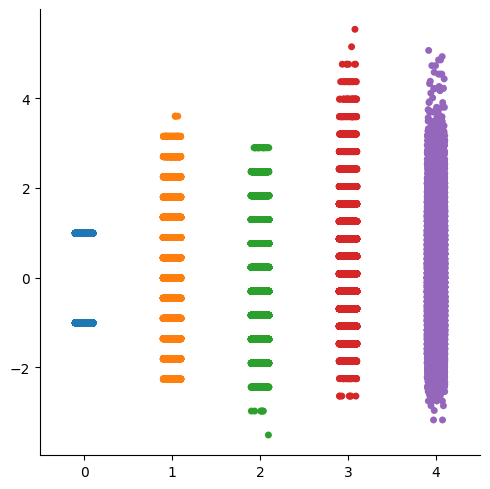

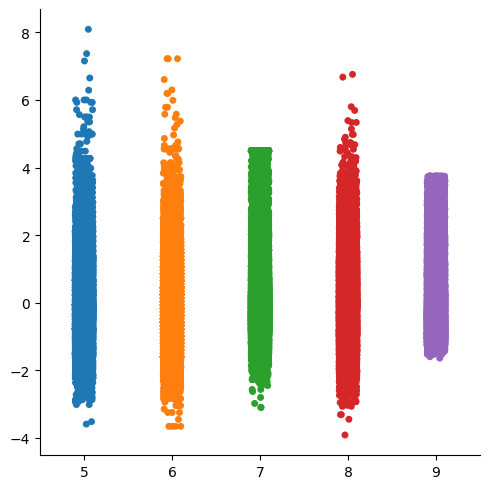

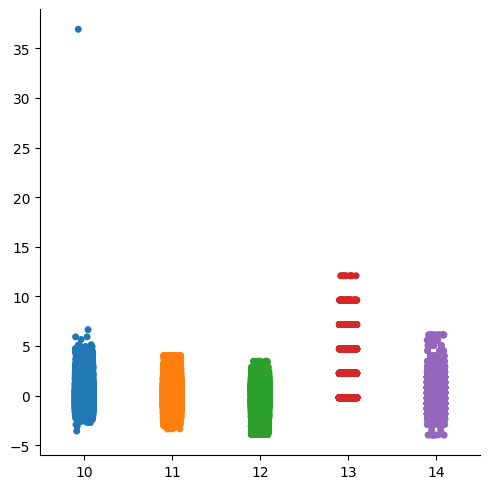

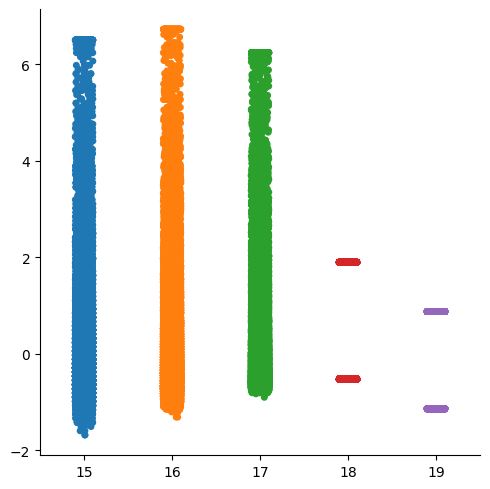

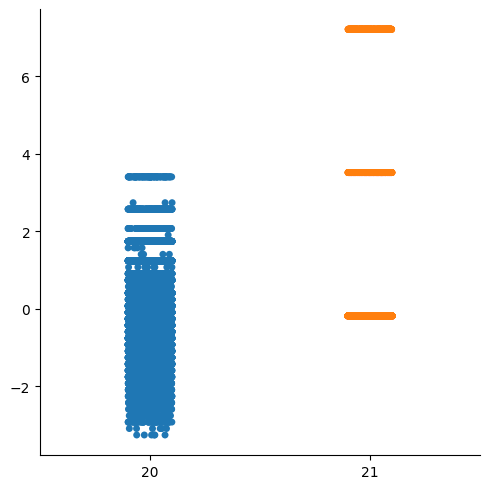

In [151]:
#CatPlot
#CatPlots
sns.catplot(X_standard.iloc[:, 0:5])
sns.catplot(X_standard.iloc[:, 5:10])
sns.catplot(X_standard.iloc[:, 10:15])
sns.catplot(X_standard.iloc[:, 15:20])
sns.catplot(X_standard.iloc[:, 20:22])

### Scaled BoxPlot


<AxesSubplot: xlabel='gender'>

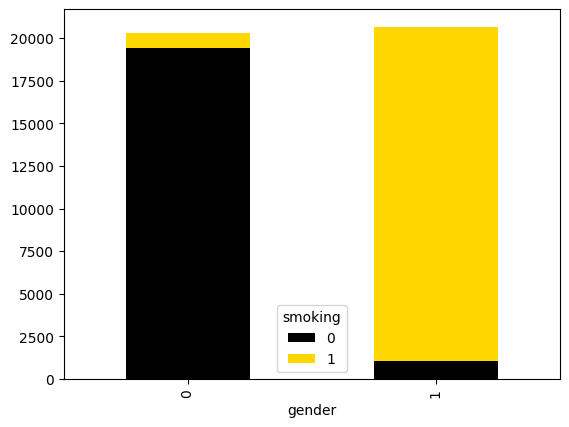

In [152]:
#BoxPlot
smoker_counts = pd.crosstab(index=[new_df['gender']], columns=new_df['smoking'], margins=True)

smoker_counts.iloc[:-1, :-1].plot(kind='bar', stacked=True, color=['black', 'gold'], grid=False, )


### Scaled HeatMap

<AxesSubplot: >

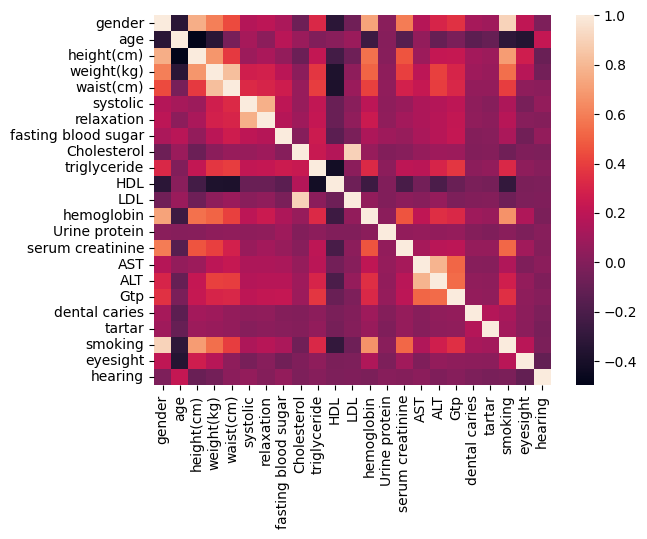

In [153]:
#HeatMap
corelation=new_df.corr()
sns.heatmap(corelation)

<AxesSubplot: ylabel='gender'>

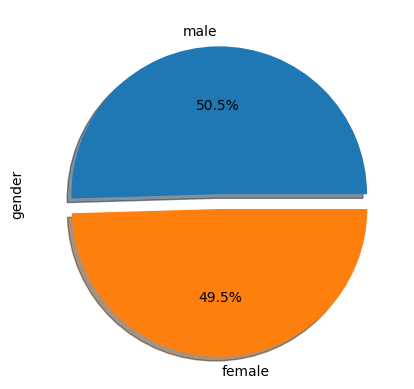

In [154]:
new_df['gender'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["male","female"], shadow=True)


<AxesSubplot: ylabel='smoking'>

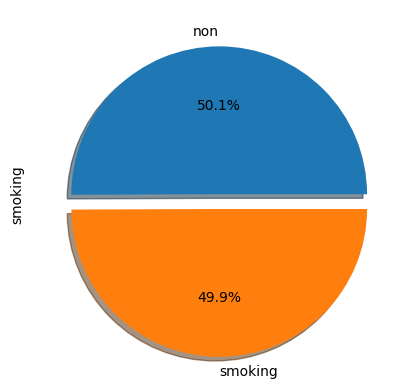

In [155]:

new_df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

# FEATURE SELECTION

### Lasso

In [156]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


# Lets find how many features are needed using a loop and 5 different feature selection method
feature_count = 12 # will go to 8
RFC = RandomForestClassifier(n_estimators=50)
model_list = {
    'Logistic': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'chi2': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Lasso': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'mutual': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'PCA': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'RFC': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'KNN': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Stacking': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Max_voting': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Deep_learning': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0}
}

for key in model_list:
    model_list[key]['accuracy'] = 0
#Only lasso is applied once
lasso = Lasso(alpha=0.0001)
lasso.fit(X_standard, Y)

# Get feature which does not have coeffient 0
selected_features = X_standard.columns[lasso.coef_ != 0]
X_lasso = X_standard[selected_features]
X_train_lasso, X_test_lasso, y_train_lasoo, y_test_lasso = train_test_split(X_lasso, Y, test_size=0.2, random_state=42)
RFC.fit(X_train_lasso, y_train_lasoo)


y_pred_lasso = RFC.predict(X_test_lasso)


precision = precision_score(y_test_lasso, y_pred_lasso)
recall = recall_score(y_test_lasso, y_pred_lasso)
f1 = f1_score(y_test_lasso, y_pred_lasso)

roc_auc = roc_auc_score(y_test_lasso, y_pred_lasso)
accuracy = accuracy_score(y_test_lasso, y_pred_lasso)

# Assign these values to the model dictionary
model_list['Lasso']['precision'] = precision
model_list['Lasso']['recall'] = recall
model_list['Lasso']['f1_score'] = f1
model_list['Lasso']['feature_count'] = X_lasso.shape[1]
model_list['Lasso']['roc_auc'] = roc_auc
model_list['Lasso']['accuracy'] = accuracy

In [157]:
model_list['Lasso']['accuracy']

0.9573974609375

### Chi2 and mutual_info with SelectKBest

In [158]:
def RFC_train_test_SelectKBest(method, feature_count, X, Y):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return f1, precision, recall, roc_auc,accuracy


feature_count = 21
while feature_count > 15:
    chi_f1, chi_precision, chi_recall, chi_roc_auc, chi_acc = RFC_train_test_SelectKBest(chi2, feature_count, X_min_max, Y)
    mutual_f1, mutual_precision, mutual_recall, mutual_roc_auc, mutual_acc = RFC_train_test_SelectKBest(mutual_info_classif, feature_count, X, Y)

    if chi_acc > model_list['chi2']['accuracy']:
        model_list['chi2']['f1'] = chi_f1
        model_list['chi2']['precision'] = chi_precision
        model_list['chi2']['recall'] = chi_recall
        model_list['chi2']['feature_count'] = feature_count
        model_list['chi2']['roc_auc'] = chi_roc_auc
        model_list['chi2']['accuracy'] = chi_acc

    if mutual_acc > model_list['mutual']['accuracy']:
        model_list['mutual']['f1'] = mutual_f1
        model_list['mutual']['precision'] = mutual_precision
        model_list['mutual']['recall'] = mutual_recall
        model_list['mutual']['feature_count'] = feature_count
        model_list['mutual']['roc_auc'] = mutual_roc_auc
        model_list['mutual']['accuracy'] = mutual_acc
    feature_count -= 1


### PCA


In [159]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
#PCA

# Apply PCA
# chi2 gives best performance at feature numberr 16 so we will use 16 feature end of the code from herek_best = SelectKBest(score_func=method, k=feature_count)
k_best = SelectKBest(score_func=chi2, k=17)
X_PCA = k_best.fit_transform(X_min_max, Y)



# Initialize SVM classifier
pipe = make_pipeline(PCA(n_components=5), RFC)

# Specify the number of folds for K-fold cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validatio
accuracy_scores=[]
for train_index, test_index in kf.split(X_PCA):
    
    X_train, X_test = X_PCA[train_index], X_PCA[test_index]
    y_train, y_test = Y.to_numpy()[train_index], Y.to_numpy()[test_index]
    
    # Train the model on the training fold
    pipe.fit(X_train, y_train)
    
    # Predict on the validation fold
    predictions = pipe.predict(X_test)
    
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)


    if accuracy >= model_list['PCA']['accuracy']:
        model_list['PCA']['precision'] = precision
        model_list['PCA']['recall'] = recall
        model_list['PCA']['f1_score'] = f1
        model_list['PCA']['feature_count'] = 5
        model_list['PCA']['roc_auc'] = roc_auc
        model_list['PCA']['accuracy'] = accuracy


### RFC

In [160]:

def RFC_train_test_RFC(X, Y, feature_count):
    RFC.fit(X, Y)

    # Access feature importances
    feature_importances = RFC.feature_importances_

    # Sort the features
    sorted_feature_indices = feature_importances.argsort()[::-1]

    selected_feature_indices = sorted_feature_indices[:feature_count]

    # Select specified features within cuDF
    X_selected = X_standard.iloc[:, selected_feature_indices]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return f1, precision, recall, roc_auc, accuracy

feature_count = 15
while feature_count < 20:
    RFC_f1, RFC_precision, RFC_recall, RFC_roc_auc, RFC_accuracy = RFC_train_test_RFC(X_standard, Y, feature_count)
    if RFC_accuracy > model_list['RFC']['accuracy']:
        model_list['RFC']['f1'] = RFC_f1
        model_list['RFC']['precision'] = RFC_precision
        model_list['RFC']['recall'] = RFC_recall
        model_list['RFC']['feature_count'] = feature_count
        model_list['RFC']['roc_auc'] = RFC_roc_auc
        model_list['RFC']['accuracy'] = RFC_accuracy
    feature_count += 1


In [161]:
def logistic_chi(method, feature_count, X, Y, LR):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return f1, precision, recall, roc_auc,accuracy

### Logisctic Reggression

In [162]:
#Logistic Regression Here
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)
Logistic_model = LogisticRegression(random_state=42,max_iter=10000)



feature_count = 21
while feature_count > 15:
    lr_f1, lr_precision, lr_recall, lr_roc_auc, lr_accuracy = logistic_chi(chi2, feature_count, X_min_max, Y,Logistic_model)
    if lr_accuracy > model_list['Logistic']['accuracy']:
        model_list['Logistic']['f1'] = lr_f1
        model_list['Logistic']['precision'] = lr_precision
        model_list['Logistic']['recall'] = lr_recall
        model_list['Logistic']['feature_count'] = feature_count
        model_list['Logistic']['roc_auc'] = lr_roc_auc
        model_list['Logistic']['accuracy'] = lr_accuracy
    feature_count -= 1

# Display the results
print(f'Accuracy: {lr_accuracy}')

Accuracy: 0.9508056640625


In [163]:
# chi2 gives best performance at feature numberr 17 so we will use 16 feature end of the code from herek_best = SelectKBest(score_func=method, k=feature_count)
k_best = SelectKBest(score_func=chi2, k=17)
X_standard = k_best.fit_transform(X_min_max, Y)

### KNN


In [164]:
#KNN here  
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)    
accuracy_knn = []
for i in range(5,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  accuracy_knn.append(accuracy_score(y_test, pred_i))


  f1 = f1_score(y_test, pred_i)
  precision = precision_score(y_test, pred_i)
  recall = recall_score(y_test, pred_i)
  roc_auc = roc_auc_score(y_test, pred_i)
  accuracy = accuracy_score(y_test, pred_i)


  if accuracy >= model_list['KNN']['accuracy']:
      model_list['KNN']['precision'] = precision
      model_list['KNN']['recall'] = recall
      model_list['KNN']['f1_score'] = f1
      model_list['KNN']['feature_count'] = 16
      model_list['KNN']['roc_auc'] = roc_auc
      model_list['KNN']['accuracy'] = accuracy
      

#Bad result beacuse of imbalanced data here!

### Max voting

In [165]:
#Max voting here
from sklearn.ensemble import VotingClassifier

DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
LR = LogisticRegression(max_iter=1000)
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=13)

final_model = VotingClassifier( estimators=[ ('dt', DTC ), ('rf', RFC), ('lr', LR), ('gb', GBC),('NB', NB), ('KNN', KNN) ])
 
# training all the model on the train dataset
x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(x_test)
 
f1 = f1_score(y_test, pred_final)
precision = precision_score(y_test, pred_final)
recall = recall_score(y_test, pred_final)
roc_auc = roc_auc_score(y_test, pred_final)
accuracy = accuracy_score(y_test, pred_final)


model_list['Max_voting']['precision'] = precision
model_list['Max_voting']['recall'] = recall
model_list['Max_voting']['f1_score'] = f1
model_list['Max_voting']['feature_count'] = 16
model_list['Max_voting']['roc_auc'] = roc_auc
model_list['Max_voting']['accuracy'] = accuracy
print(accuracy)


0.9508056640625


### Stacking

In [166]:
#Stacking Here
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
base_models = [
    ('logistic', LogisticRegression(max_iter=500)),
    ('random_forest', RandomForestClassifier(n_estimators=75)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=75)),
    ('knn', KNeighborsClassifier(n_neighbors=13)),
    ('Extra', ExtraTreesClassifier(n_estimators=75)),
    ('SVM', SVC(kernel='linear', C=1.0, cache_size=1000)), 
    ('adaboost', AdaBoostClassifier(n_estimators=70))  
]

stacked_model = StackingClassifier(estimators = base_models, final_estimator=RandomForestClassifier())
x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)

# Train the stacking model
stacked_model.fit(x_train, y_train)

# Make predictions
stacked_predictions = stacked_model.predict(x_test)

f1 = f1_score(y_test, stacked_predictions)
precision = precision_score(y_test, stacked_predictions)
recall = recall_score(y_test, stacked_predictions)
roc_auc = roc_auc_score(y_test, stacked_predictions)
accuracy = accuracy_score(y_test, stacked_predictions)


model_list['Stacking']['precision'] = precision
model_list['Stacking']['recall'] = recall
model_list['Stacking']['f1_score'] = f1
model_list['Stacking']['feature_count'] = 16
model_list['Stacking']['roc_auc'] = roc_auc
model_list['Stacking']['accuracy'] = accuracy
print(accuracy)

0.957275390625


### Deep Learning

In [167]:
#Deep Learning Here

In [168]:
best_method = None
best_acc = 0

for method, info in model_list.items():
    acc = info['accuracy']
    if acc > best_acc:
        best_method = method
        best_acc = acc
    print(f"{method} has accuracy={info['accuracy']:.4f} roc_auc={info['roc_auc']:.4f}, f1={info['f1']:.4f}, precision={info['precision']:.4f}, recall={info['recall']:.4f}, feature_count={info['feature_count']}")

print(f"The best feature selection method is '{best_method}' with an accuracy of {best_acc:.4f} and feature count {model_list[best_method]['feature_count']}")

Logistic has accuracy=0.9508 roc_auc=0.9508, f1=0.9507, precision=0.9458, recall=0.9558, feature_count=21
chi2 has accuracy=0.9576 roc_auc=0.9577, f1=0.9578, precision=0.9480, recall=0.9678, feature_count=21
Lasso has accuracy=0.9574 roc_auc=0.9575, f1=0.0000, precision=0.9478, recall=0.9676, feature_count=22
mutual has accuracy=0.9575 roc_auc=0.9576, f1=0.9577, precision=0.9478, recall=0.9678, feature_count=21
PCA has accuracy=0.9603 roc_auc=0.9603, f1=0.0000, precision=0.9530, recall=0.9686, feature_count=5
RFC has accuracy=0.9575 roc_auc=0.9576, f1=0.9577, precision=0.9478, recall=0.9678, feature_count=18
KNN has accuracy=0.9508 roc_auc=0.9508, f1=0.0000, precision=0.9460, recall=0.9555, feature_count=16
Stacking has accuracy=0.9573 roc_auc=0.9573, f1=0.0000, precision=0.9477, recall=0.9673, feature_count=16
Max_voting has accuracy=0.9508 roc_auc=0.9508, f1=0.0000, precision=0.9460, recall=0.9555, feature_count=16
Deep_learning has accuracy=0.0000 roc_auc=0.0000, f1=0.0000, precisio